In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


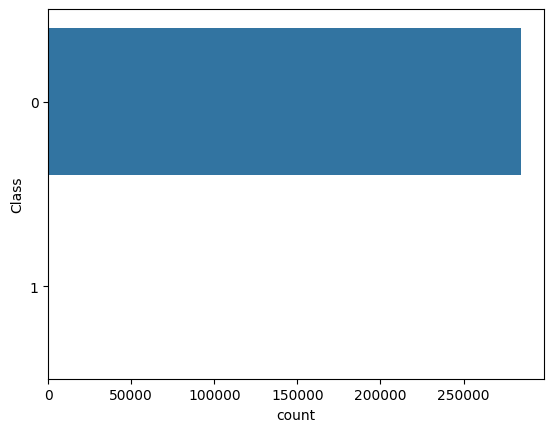

In [6]:
plt.figure()
sns.countplot(data=df,y="Class")
plt.show()

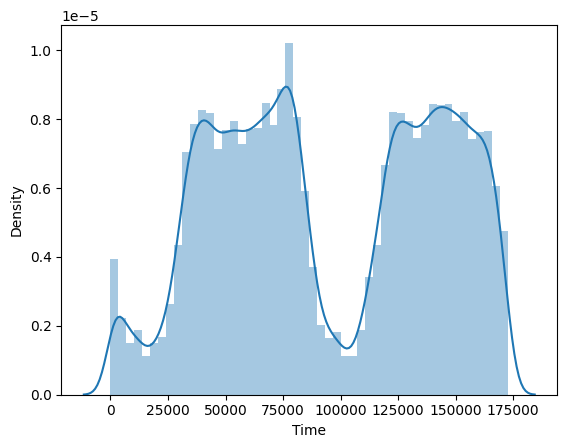

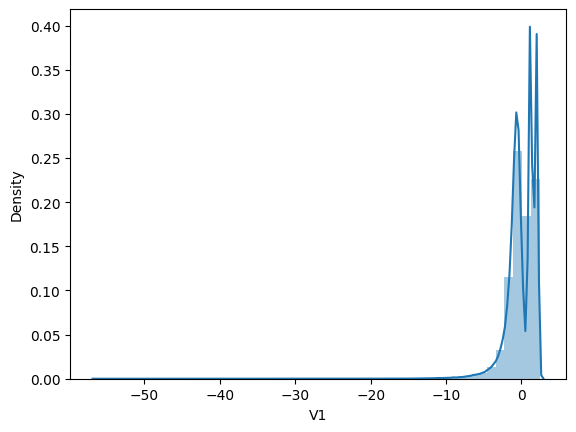

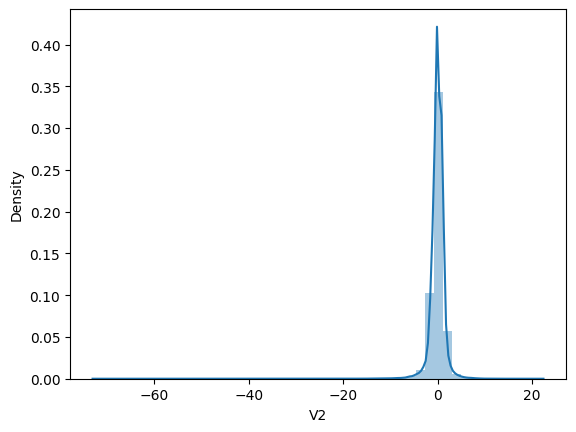

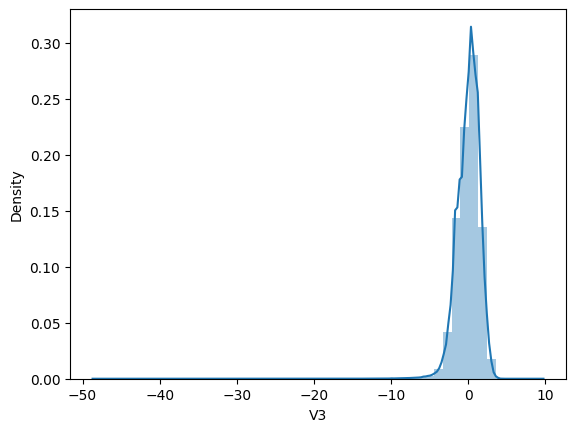

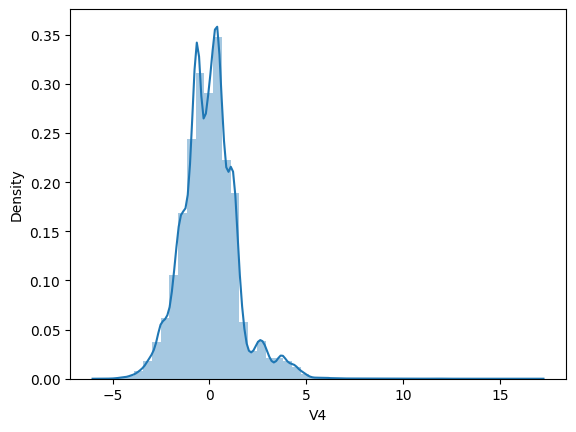

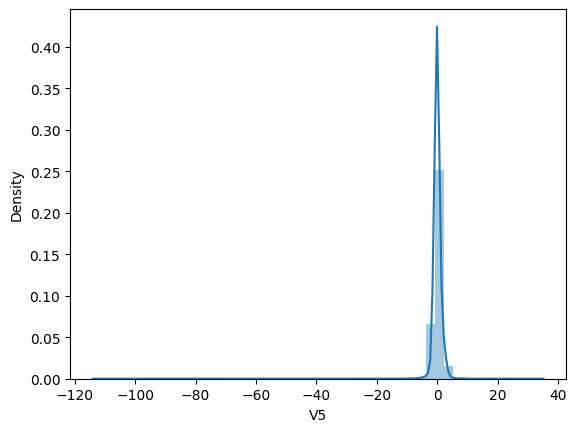

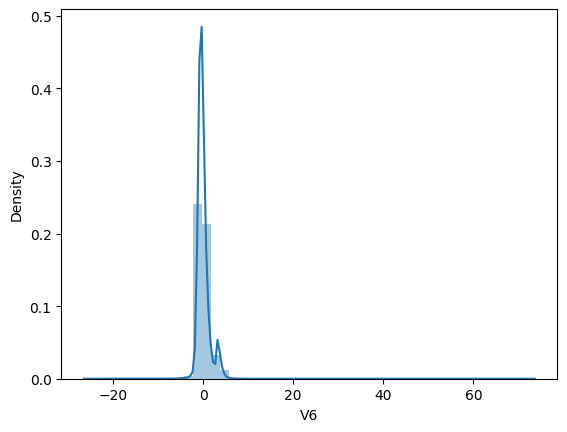

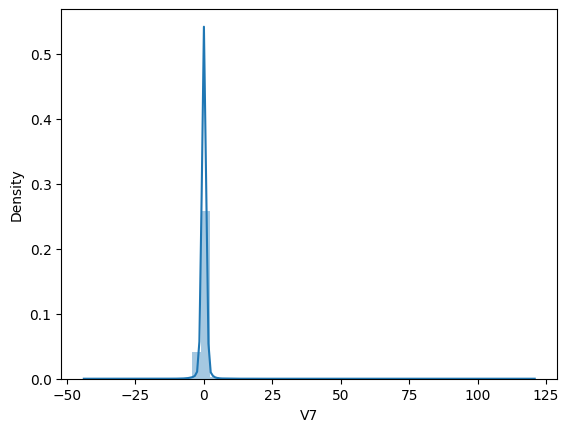

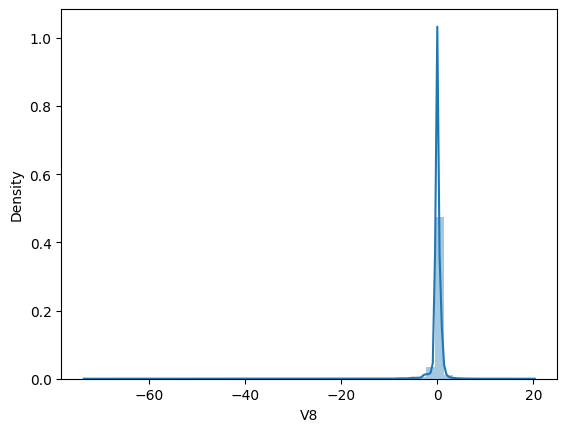

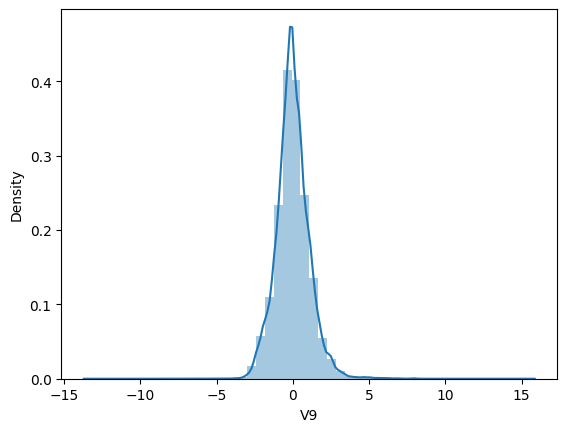

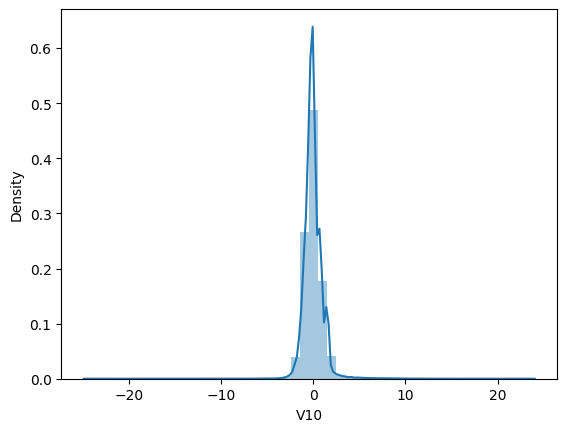

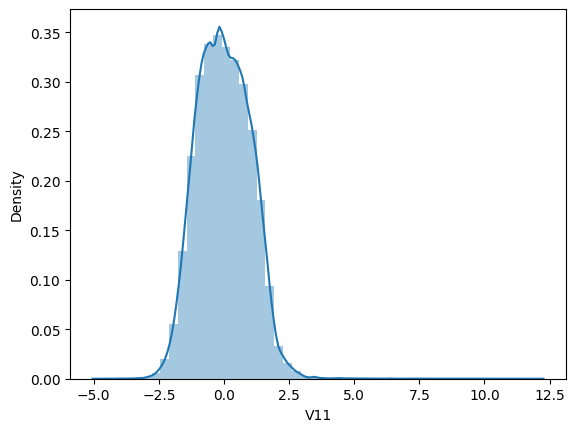

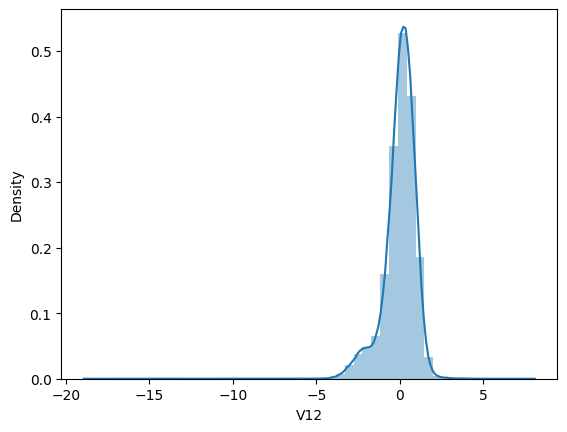

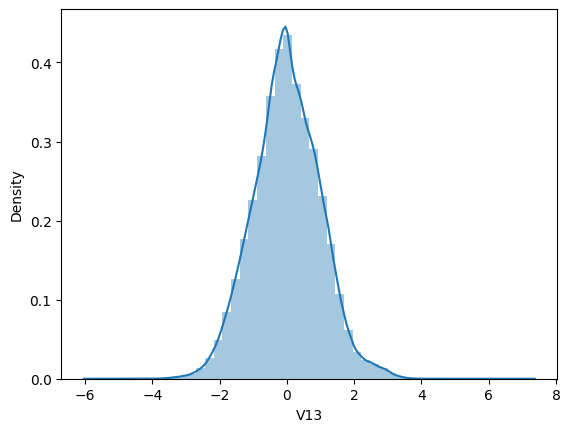

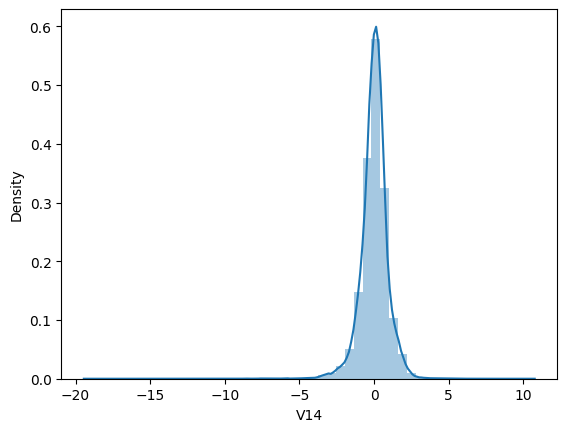

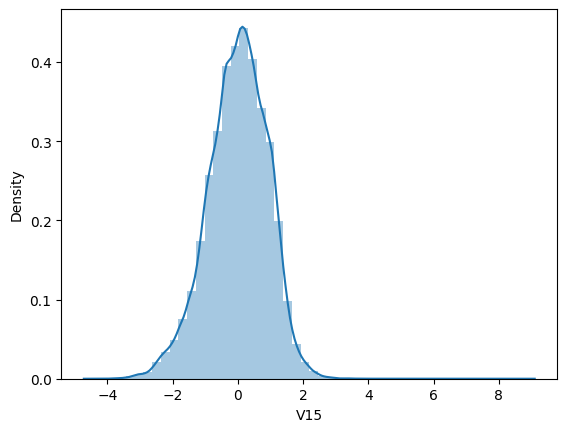

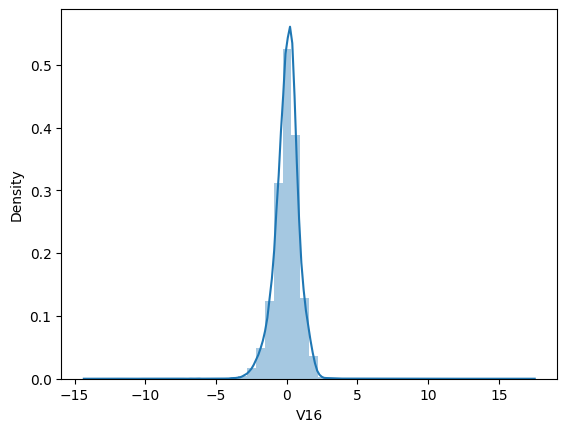

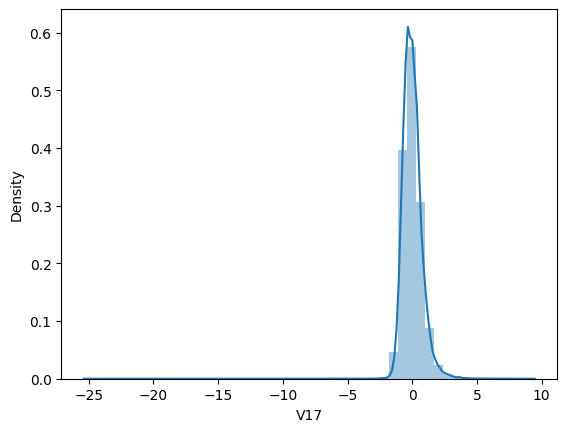

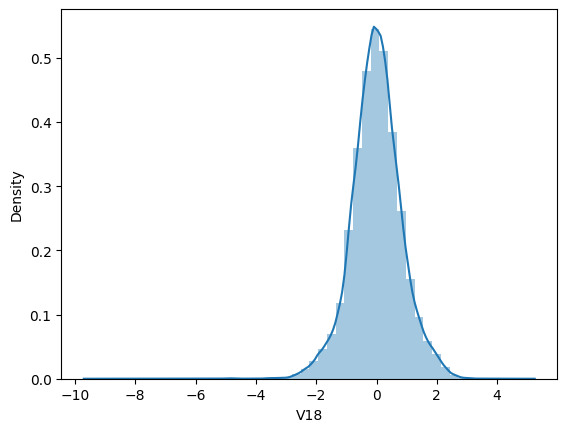

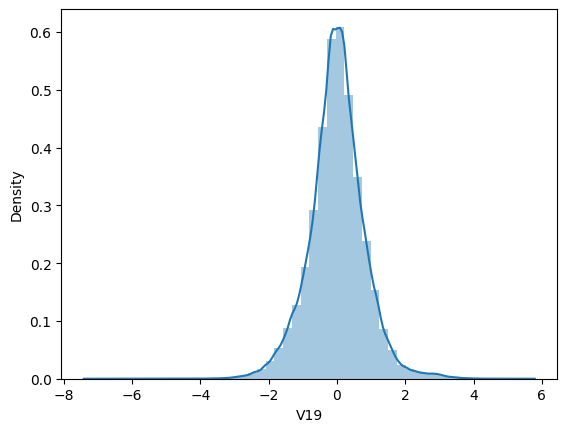

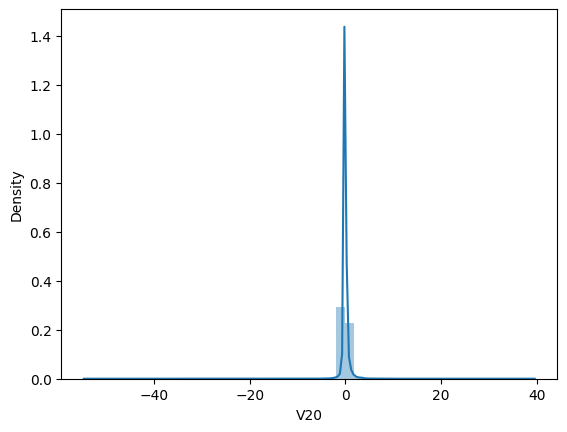

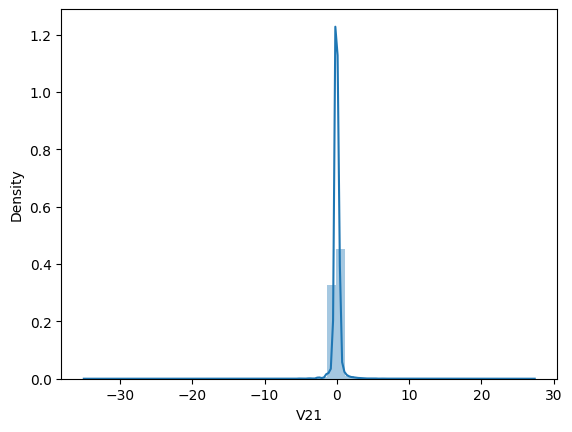

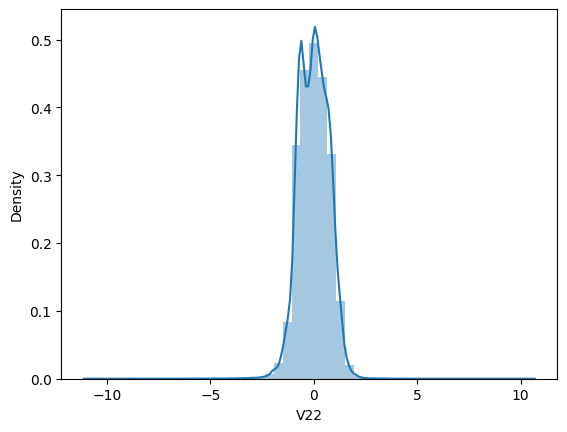

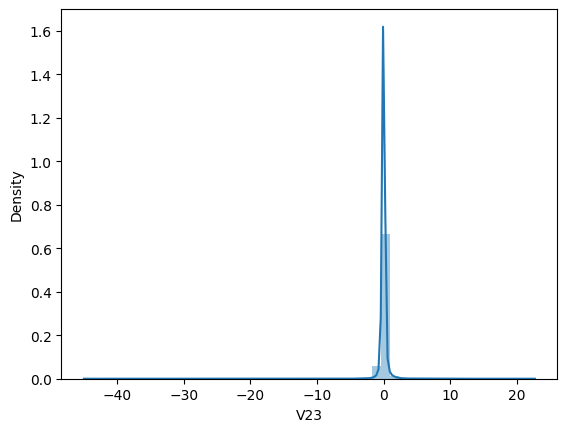

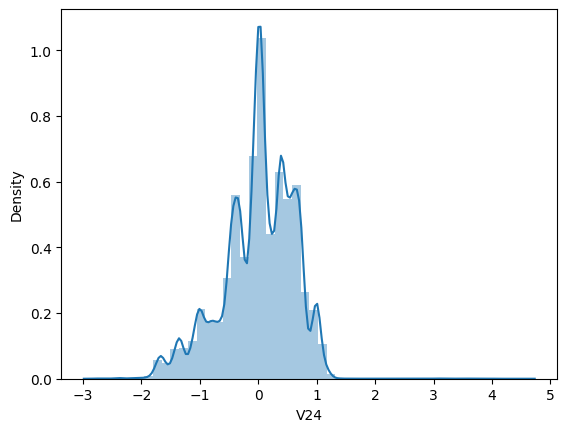

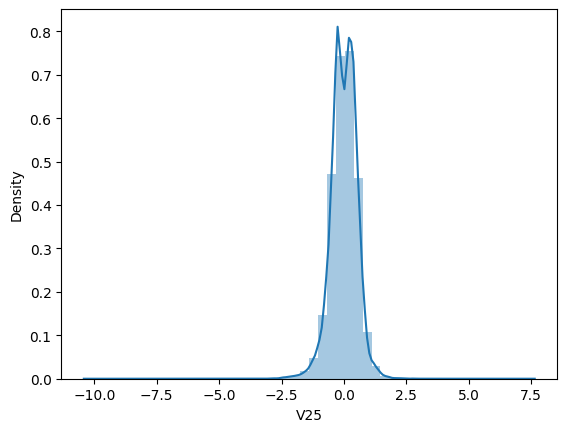

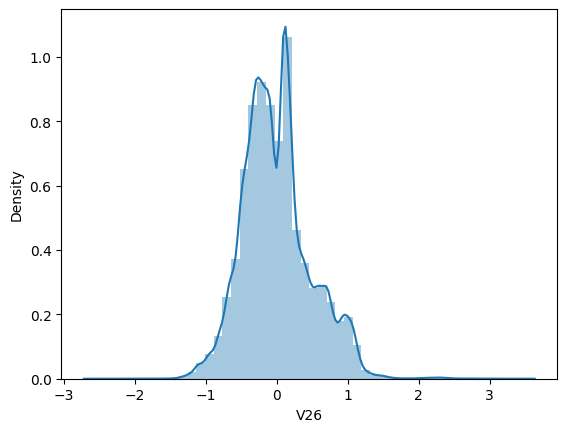

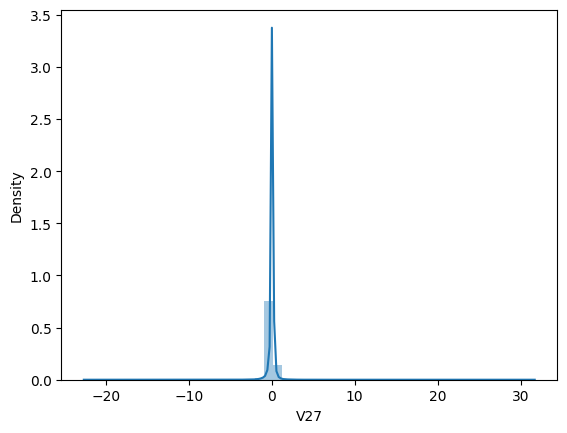

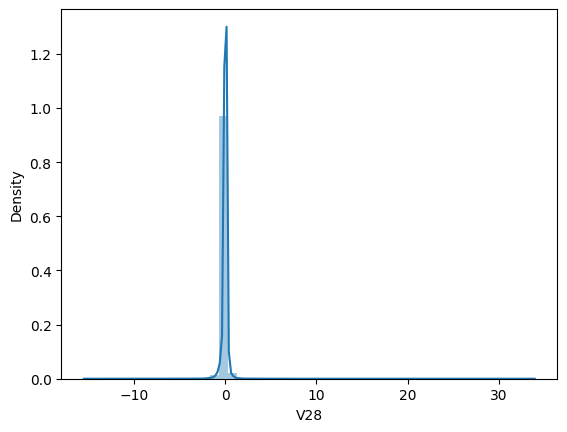

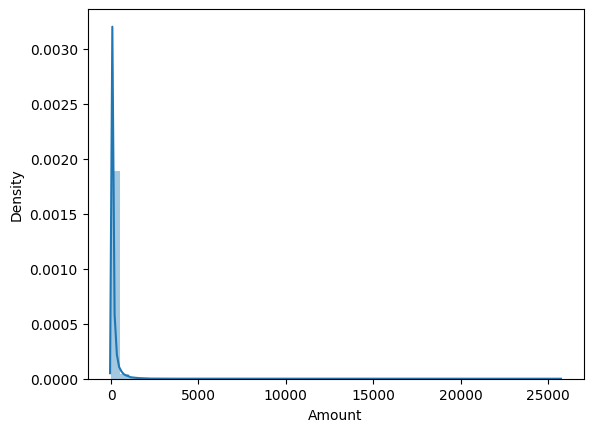

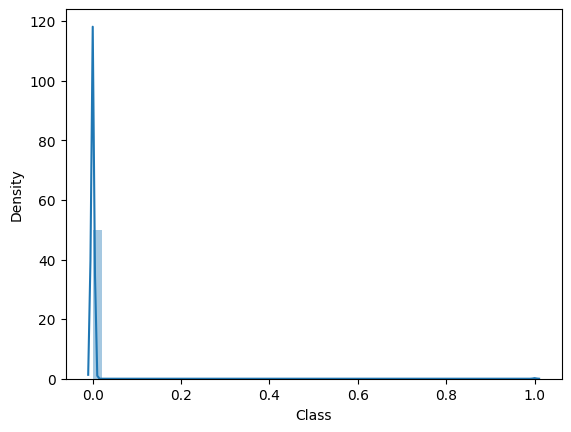

In [7]:
for col in df:
    plt.figure()
    sns.distplot(df[col]) #distplot means distribution plot
    plt.show()

In [8]:
from scipy.stats import skew #for using mathmatical function skew 

In [9]:
 skew(df["Class"])  

23.99745292182408

In [10]:
for col in df:
    print(col,":",skew(df[col]))

Time : -0.03556743068120296
V1 : -3.280650024359956
V2 : -4.624841215356954
V3 : -2.2401436419416543
V4 : 0.6762885361363855
V5 : -2.425888719378559
V6 : 1.8265710448869008
V7 : 2.5538939666831117
V8 : -8.521899311980174
V9 : 0.5546768505565418
V10 : 1.1871343376109695
V11 : 0.35650397786795557
V12 : -2.278388935683072
V13 : 0.0652331143394307
V14 : -1.9951653322115102
V15 : -0.3084213577546761
V16 : -1.1009604775565411
V17 : -3.844894223735797
V18 : -0.2598788993745328
V19 : 0.109191184897714
V20 : -2.0371445699300117
V21 : 3.5929722697554753
V22 : -0.21325649967250146
V23 : -5.875109397316075
V24 : -0.5524963913014509
V25 : -0.41579040044741566
V26 : 0.5766895799228516
V27 : -1.170202779255609
V28 : 11.19203224646587
Amount : 16.97763503663315
Class : 23.99745292182408


<Axes: >

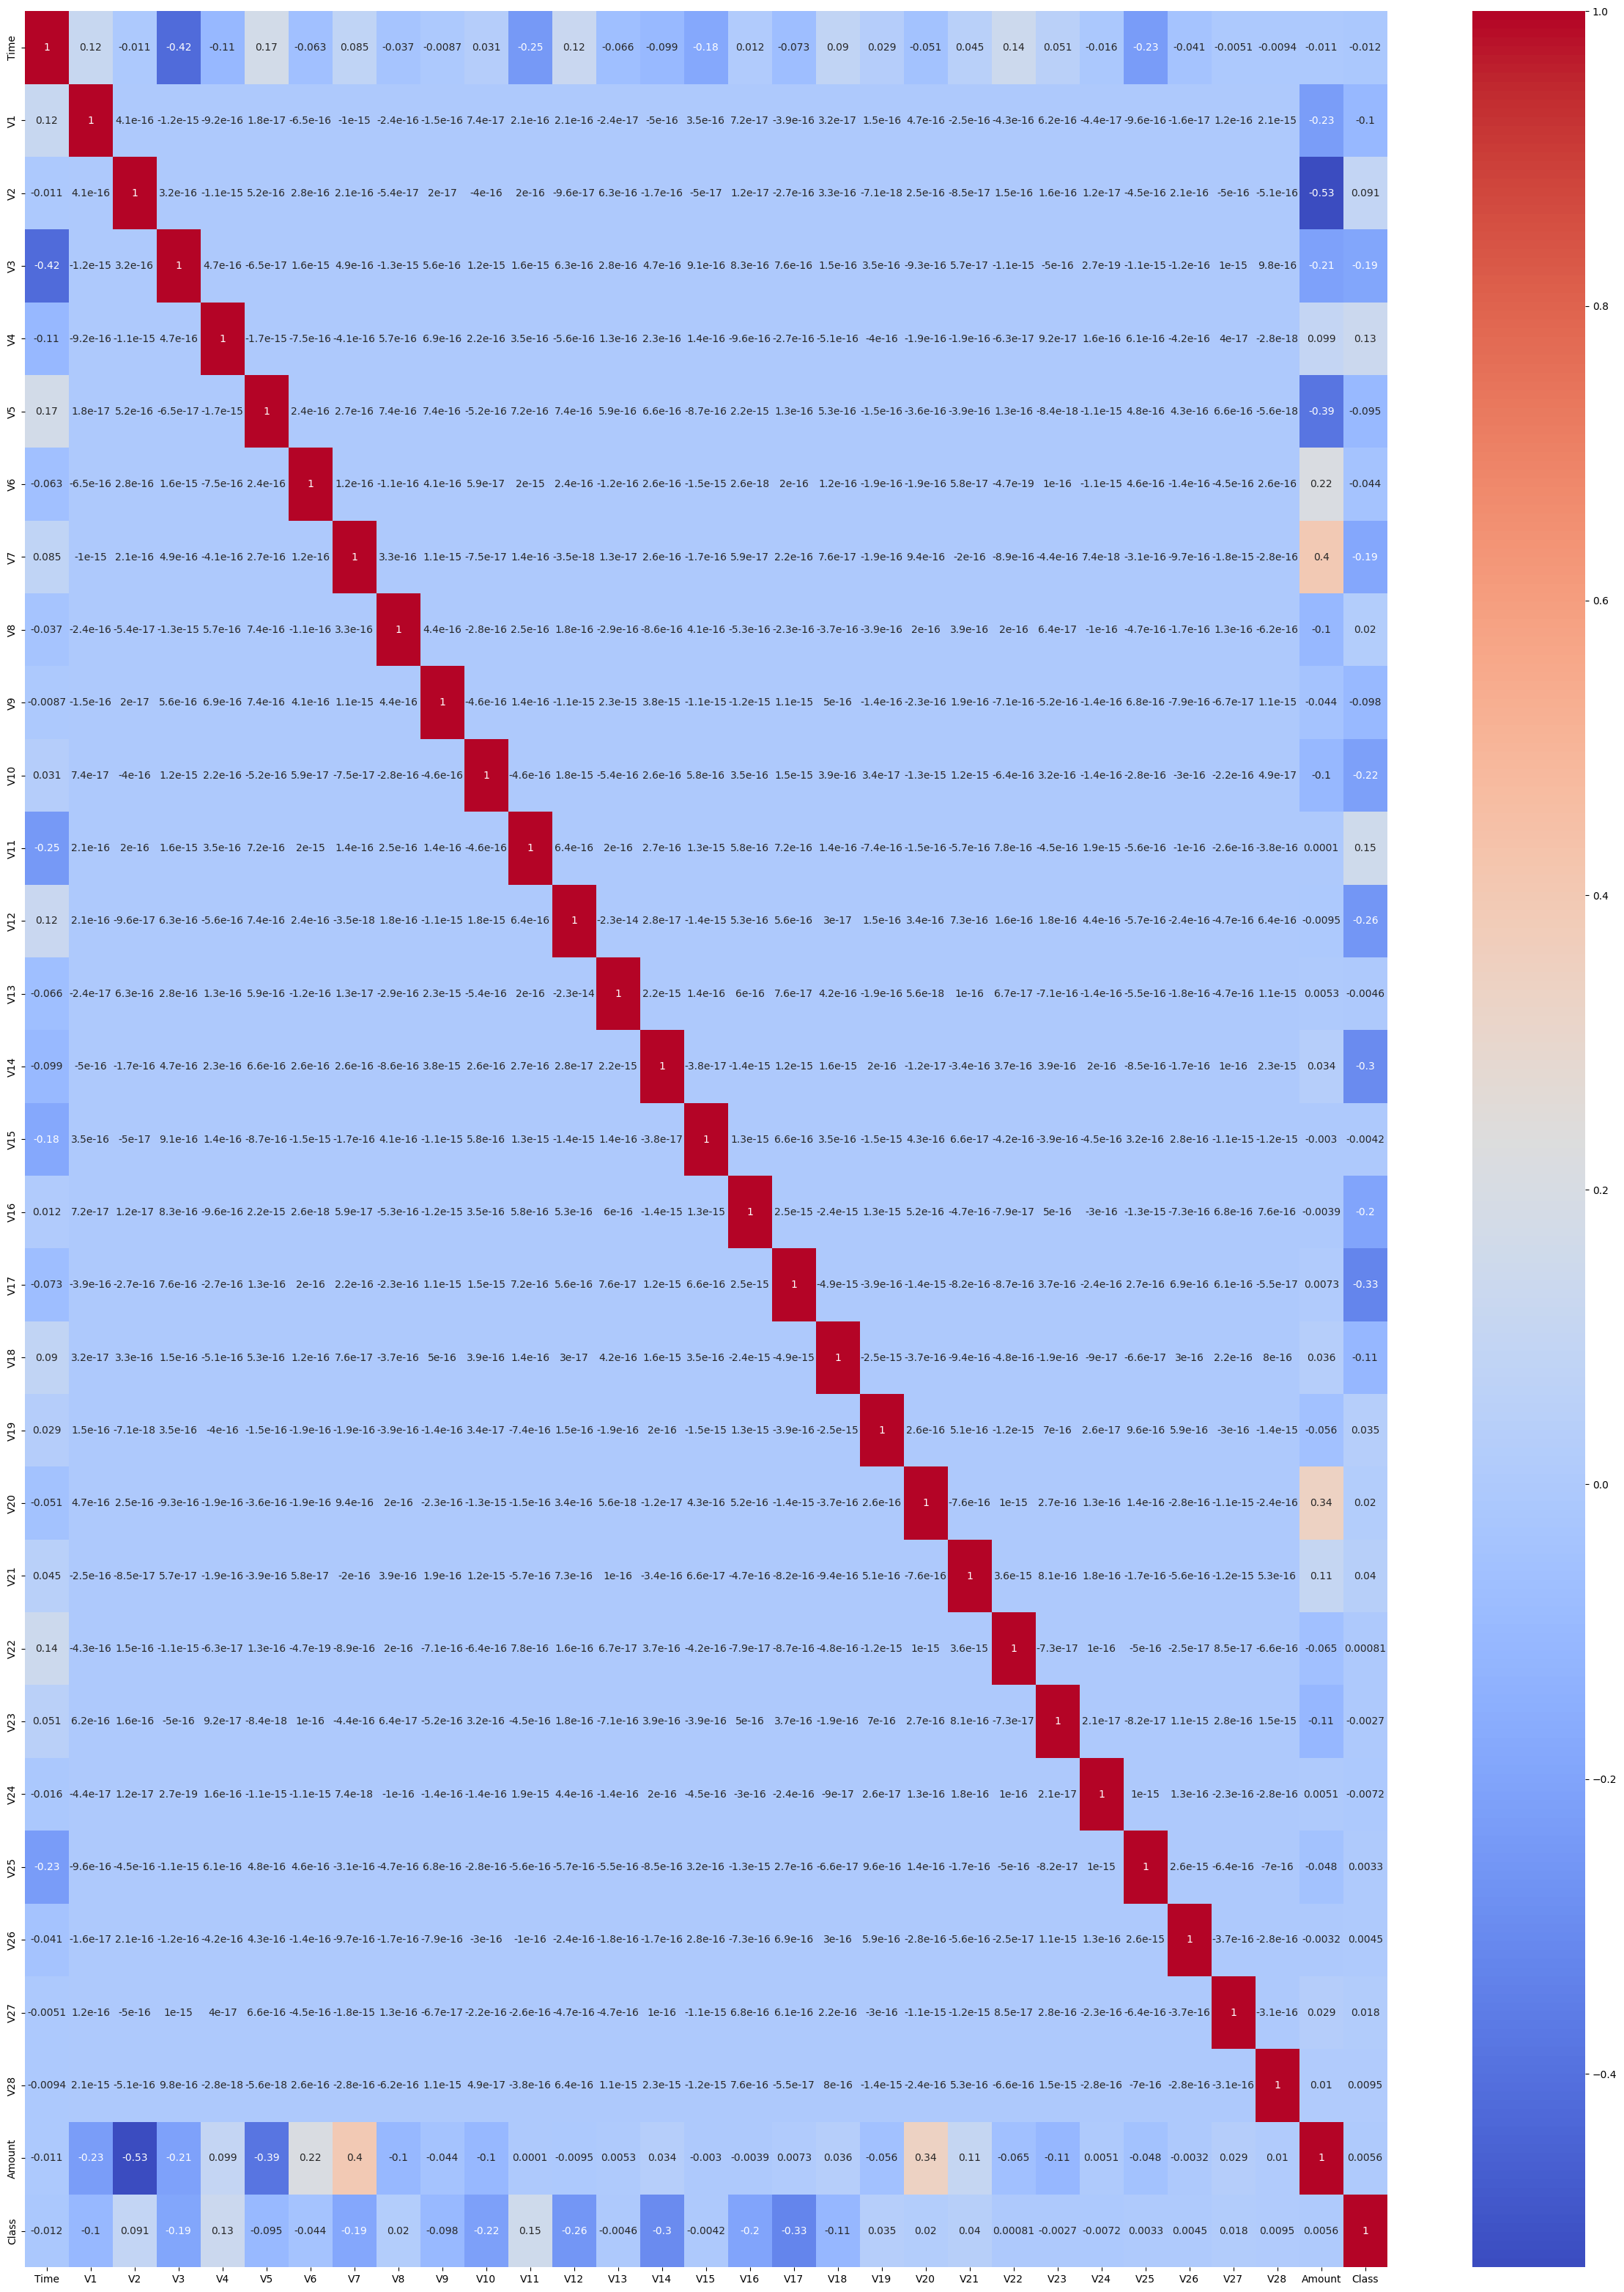

In [11]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [12]:
X=df.drop("Class",axis=1)

In [13]:
Y=df["Class"]

In [14]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [15]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [16]:
#Trian_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:

from imblearn.over_sampling import RandomOverSampler#To n ML

In [18]:
rs=RandomOverSampler(random_state=1)

In [19]:
X_sample,Y_sample=rs.fit_resample(X_train,Y_train)

In [20]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,...,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199,14.37
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,...,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814,9.00
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,...,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179,1.98
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,...,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441,4.60
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,...,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114,46.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80


In [21]:
Y_train

191125    0
153710    0
261216    0
190724    0
127492    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: Class, Length: 199364, dtype: int64

In [22]:
Y_train.value_counts()

Class
0    199007
1       357
Name: count, dtype: int64

In [23]:
X_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,...,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199,14.37
1,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,...,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814,9.00
2,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,...,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179,1.98
3,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,...,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441,4.60
4,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,...,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114,46.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398009,133731.0,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,-3.156827,...,0.329568,0.129372,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,0.00
398010,41138.0,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,...,1.682160,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,340.11
398011,97235.0,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,...,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,9.82
398012,25231.0,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,...,1.534920,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,99.99


In [24]:
Y_sample

0         0
1         0
2         0
3         0
4         0
         ..
398009    1
398010    1
398011    1
398012    1
398013    1
Name: Class, Length: 398014, dtype: int64

In [25]:
Y_sample.value_counts()

Class
0    199007
1    199007
Name: count, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf=RandomForestClassifier(n_estimators=70,max_depth=15)

In [29]:
rf.fit(X_sample,Y_sample)

RandomForestClassifier(max_depth=15, n_estimators=70)

In [31]:
y_predn=rf.predict(X_test)

In [32]:
print(classification_report(Y_test,y_predn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.79      0.81       135

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

